# Mod 8 CS II

In [14]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
"""1. We shall use the same dataset used in previous assignment - digits. Make a 80-20 train/test split.
[Hint: Explore datasets module from scikit learn]""" 

#Loading the digits dataset
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
#Creating Features
images = digits.images.reshape(digits.images.shape[0], -1)

#Creating Target variable
labels = digits.target.reshape(digits.images.shape[0], -1)

In [4]:
print(images.shape)
print(labels.shape)

(1797, 64)
(1797, 1)


<Figure size 432x288 with 0 Axes>

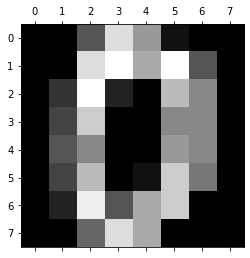

In [5]:
# Let's see how the image looks like
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

In [6]:
"""2. Make a train -test split with 20% of the data set aside for testing. Fit a logistic
regression model and observe the accuracy"""
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=10)

In [7]:
from sklearn.linear_model import LogisticRegression as logReg
log_reg = logReg().fit(X_train, y_train)

#Printing coeffs and intercept
print(f"Coeff: {log_reg.coef_}")
print(f"Intercept: {log_reg.intercept_}")


#Predicting the data
y_pred = log_reg.predict(X_test)
logReg_score = accuracy_score(y_pred, y_test)
print(f"Accuracy score of Logistic Regression: {logReg_score}")

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Coeff: [[ 0.00000000e+00 -8.98322386e-03 -3.11492459e-02  3.35568849e-02
   5.17246309e-02 -1.47238043e-01 -1.20434790e-01 -9.50196629e-03
  -1.36236901e-04 -3.92955595e-02  2.21573245e-02  1.38130450e-01
   3.98695562e-02  7.62068951e-02 -6.54049304e-02 -9.82696138e-03
  -2.88797899e-05  3.96816830e-02  1.84096464e-01 -5.06009680e-03
  -3.38863111e-01  1.63051034e-01  5.98200507e-02 -3.55183082e-03
   0.00000000e+00  1.03966684e-01  1.46939530e-01 -1.86453367e-01
  -4.81595944e-01 -1.04477192e-02  1.59970178e-01 -2.47621170e-04
   0.00000000e+00  1.42644178e-01  1.25357043e-01 -1.96099561e-01
  -3.72637349e-01  2.64481712e-02  1.03208766e-01  0.00000000e+00
  -5.36969139e-04  6.17215016e-03  1.89276809e-01 -9.37215940e-02
  -2.04428398e-01  1.32262883e-01  4.38600625e-02 -5.38930431e-04
  -1.71027919e-03 -3.17241870e-02  7.51918970e-02  1.34078977e-02
   1.49260553e-01  9.85413841e-02 -5.40567614e-02 -9.13986811e-03
  -1.52338082e-05 -1.47708653e-02 -5.53061357e-02  1.18576199e-01
   

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [8]:
"""2. Using scikit learn perform a LDA on the dataset. Find out the number of components in the projected subspace.
[Hint: Refer to discriminant analysis module of scikit learn]"""

#For 95% variance, we require n_components=7
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=7).fit(X_train, y_train)


/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0.29115346 0.47677885 0.64214333 0.75927443 0.84190497 0.90732265
 0.94854806]


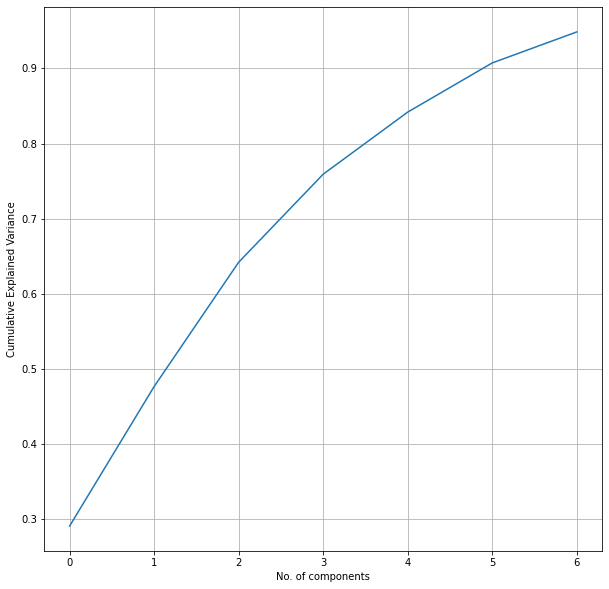

In [9]:
print(np.cumsum(lda.explained_variance_ratio_))

plt.figure(figsize=(10,10))
plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel("No. of components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

In [10]:
"""3. Transform the dataset and fit a logistic regression and observe the accuracy. 
Compare it with the previous model based on PCA in terms of accuracy and model complexity."""
#Transform the data
X_train = lda.transform(X_train)
X_test = lda.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression as logReg
log_reg = logReg().fit(X_train, y_train)

#Printing coeffs and intercept
print(f"Coeff: {log_reg.coef_}")
print(f"Intercept: {log_reg.intercept_}")


#Predicting the data
y_pred = log_reg.predict(X_test)
logReg_score = accuracy_score(y_pred, y_test)
print(f"Accuracy score of Logistic Regression: {logReg_score}")

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Coeff: [[-0.72257622 -1.98468511  0.62981512 -0.63321024  0.80951797  0.1239808
   0.26260785]
 [-0.2449567   1.62896271  0.60442913 -0.10447868 -0.41361373  0.95267121
   0.27695179]
 [ 1.45433743  0.37217057  1.55138903 -0.53821398  2.2196975  -0.04979864
   0.39170469]
 [ 1.74249993  0.05938928 -0.40112519  0.60008536 -0.21458576 -0.82598198
  -1.63913937]
 [-2.15169513  1.44810516 -0.21151995 -0.44754726 -0.09224126  0.44863703
  -0.27099242]
 [ 0.52889068 -1.32091607 -0.85628485  1.39972958  0.27283907  1.09483265
   0.27951418]
 [-1.50099704 -0.07607572  1.13536389  1.09567952 -0.36115247 -0.55116045
   0.34739159]
 [-0.19236862  0.36565711 -1.28986646 -0.74191742  0.75856864 -0.57767218
   0.01192014]
 [ 0.45132207  0.42774383  0.44065257  0.15038809 -1.39311085 -0.65348631
   0.88335182]
 [ 0.6355436  -0.92035177 -1.6028533  -0.78051499 -1.58591909  0.03797786
  -0.54331027]]
Intercept: [-1.02034998  2.00726473 -1.72445682 -0.3831419  -1.24703107 -0.21943538
 -0.3733814   1.150

In [15]:
print(f"Confusion matrix: \n{confusion_matrix(y_pred, y_test)}")
print(f"Classification report: \n{classification_report(y_pred, y_test)}")

Confusion matrix: 
[[36  0  0  0  1  0  0  0  0  0]
 [ 0 33  0  0  1  0  1  0  6  0]
 [ 0  0 34  1  0  0  0  0  1  0]
 [ 0  0  0 38  0  0  0  0  2  5]
 [ 0  0  0  0 30  0  0  3  0  0]
 [ 0  0  0  0  0 31  0  0  0  0]
 [ 1  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0]
 [ 0  1  0  1  2  0  0  0 24  2]
 [ 0  0  0  0  0  1  0  0  0 32]]
Classification report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        37
           1       0.97      0.80      0.88        41
           2       1.00      0.94      0.97        36
           3       0.95      0.84      0.89        45
           4       0.88      0.91      0.90        33
           5       0.97      1.00      0.98        31
           6       0.97      0.97      0.97        37
           7       0.93      1.00      0.96        37
           8       0.73      0.80      0.76        30
           9       0.82      0.97      0.89        33

    accuracy                  